# Machine Learning with Python
# Part 2. Supervised Learning - Classification

Author: Kang P. Lee<br>
References:
- Documentation scikit-learn (http://scikit-learn.org/stable/documentation.html)
- Introduction to Machine Learning with Python (http://shop.oreilly.com/product/0636920030515.do)

## Set the Goal

Let's aim to build a classification model from the Titanic dataset that is able to predict whether or not an imaginery passenger would have survived the tragic accident. This is a binary classification problem. 

For example, suppose there was a man of age 25 who purchased a third class ticket at £7 and was on board by himself, would he probably have died or survived?

## Import Modules

In [1]:
from seaborn import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the Dataset into a Pandas Dataframe

In [2]:
df = load_dataset("titanic")

## Say Hello to the Dataset

In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Filter Out Unnecessary Data

In [7]:
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare"]]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


## Convert Categorical Variables into Dummy Variables

As most machine learning tools will only accept numbers as input, every categorical variable in a dataset must be replaced with a numerical variable. 

In [9]:
toydf = pd.DataFrame(["female", "male", "female"], columns=["gender"])
toydf

,gender
0,female
1,male
2,female


In [10]:
# get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
# Convert categorical variable into dummy/indicator variables

pd.get_dummies(toydf)

,gender_female,gender_male
0,1,0
1,0,1
2,1,0


In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
df = pd.get_dummies(df)

In [13]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


## Handle Missing Data

As with categorical variables, most machine learning tools will not accept null values as input. Every null value in a dataset must be removed or replaced with a numerical value. 

In [14]:
df[df.isnull().any(axis=1)]

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male
5,0,3,NaN,0,0,8.4583,0,1
17,1,2,NaN,0,0,13.0000,0,1
19,1,3,NaN,0,0,7.2250,1,0
26,0,3,NaN,0,0,7.2250,0,1
28,1,3,NaN,0,0,7.8792,1,0
29,0,3,NaN,0,0,7.8958,0,1
31,1,1,NaN,1,0,146.5208,1,0
32,1,3,NaN,0,0,7.7500,1,0
36,1,3,NaN,0,0,7.2292,0,1
42,0,3,NaN,0,0,7.8958,0,1


In [15]:
# fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
# Fill NA/NaN values using the specified method

df.age = df.age.fillna(value=df.age.mean())

There are several ways to handle missing data: just remove the records that contain missing values, replace the missing values with a mean value or a value of the closest neighbor, etc. 

In [16]:
df[df.isnull().any(axis=1)]

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male


## Prepare Data for Modeling

In [17]:
features = ["pclass", "age", "sibsp", "parch", "fare", "sex_female", "sex_male"]
target = "survived"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male
105,3,28.0,0,0,7.8958,0,1
68,3,17.0,4,2,7.9250,1,0
253,3,30.0,1,0,16.1000,0,1
320,3,22.0,0,0,7.2500,0,1
706,2,45.0,0,0,13.5000,1,0


In [19]:
y_train.head()

105    0
68     1
253    0
320    0
706    1
Name: survived, dtype: int64

## Modeling with k-Nearest Neigobors (k-NN)

In [20]:
# KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
#                      metric_params=None, n_jobs=1, **kwargs)

knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
knn.score(X_train, y_train)

0.97754491017964074

In [23]:
knn.score(X_test, y_test)

0.70403587443946192

In [24]:
person1 = {"pclass": 3, 
           "age": 25,
           "sibsp": 0,
           "parch": 0,
           "fare": 7,
           "sex_female": 0,
           "sex_male": 1}

person2 = {"pclass": 1, 
           "age": 8,
           "sibsp": 1,
           "parch": 2,
           "fare": 40,
           "sex_female": 1,
           "sex_male": 0}

person3 = {"pclass": 2, 
           "age": 20,
           "sibsp": 0,
           "parch": 0,
           "fare": 15,
           "sex_female": 1,
           "sex_male": 0}

X_new = []
for person in [person1, person2, person3]:
    X_new.append([person["pclass"], person["age"], person["sibsp"], person["parch"], person["fare"], person["sex_female"], person["sex_male"]])

knn.predict(X_new)

array([0, 1, 0], dtype=int64)

The k-NN model predicts that the persons 1 and 3 would have died while person 2 would have survived.

## Modeling with Logistic Regression

In [25]:
# LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
#                    class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
#                    verbose=0, warm_start=False, n_jobs=1)

lr = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr.score(X_train, y_train)

0.80389221556886226

In [28]:
lr.score(X_test, y_test)

0.78923766816143492

In [29]:
lr.predict(X_new)

array([0, 1, 1], dtype=int64)

This time, the logistic regression model predicts that the person 3 would have survived, unlike the prediction of the above k-NN model. 

## Handle Overfitting Using Regularization

In [30]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
train_scores = []
test_scores = []
best_score = 0

for C in Cs:
    print("C = {0}".format(C))
    lr = LogisticRegression(C=C)
    lr.fit(X_train, y_train)
    
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    
    # Keep track of the best test score and its corresponding parameters 
    if test_score > best_score:
        best_score = test_score
        best_parameters = {"C": C}
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print("%.2f" %train_score)
    print("%.2f" %test_score)
    print()

C = 0.01
0.75
0.78

C = 0.03
0.81
0.78

C = 0.1
0.80
0.77

C = 0.3
0.81
0.78

C = 1
0.80
0.79

C = 3
0.80
0.79

C = 10
0.80
0.79

C = 30
0.81
0.79

C = 100
0.80
0.80

C = 300
0.80
0.80



As opposed to the alpha in linear regression, higher values of C correspond to less regularization, where as lower values of C to more regularization.

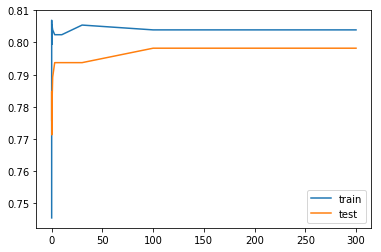

In [31]:
plt.plot(Cs, train_scores, label="train")
plt.plot(Cs, test_scores, label="test")
legend()
plt.show()

In [32]:
best_score, best_parameters

(0.7982062780269058, {'C': 100})

In [33]:
lr_best = LogisticRegression(**best_parameters)
lr_best.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
lr_best.score(X_test, y_test)

0.7982062780269058

## Modeling with Linear Support Vector Machines (SVMs)

In [35]:
# LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, 
#           intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

svm = LinearSVC()

In [36]:
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [37]:
svm.score(X_train, y_train)

0.69311377245508987

In [38]:
svm.score(X_test, y_test)

0.6905829596412556

In [39]:
svm.predict(X_new)

array([0, 1, 1], dtype=int64)

## Feature Scaling

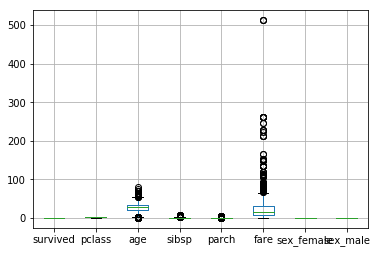

In [40]:
df.boxplot(figsize=(10, 7))

Features age and fare have a wider range of values than the other features, which means those features may have a greater impact on the target just because they have a wider range of values. Therefore, it must be reasonable to transform the data that yield more standard ranges.

In [41]:
scaler = MinMaxScaler()

The MinMaxScaler shifts the data such that all features are exactly between 0 and 1. There are other kinds of scalers such as StandardScaler, RobustScaler and Normalizer.

In [42]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [43]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

You don't have to scale <i>y</i>, because <i>y</i>, which is the target variable, has nothing to do with the features; it must be treated separately from the features.

In [44]:
svm.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
svm.score(X_train_scaled, y_train)

0.80239520958083832

In [46]:
svm.score(X_test_scaled, y_test)

0.77578475336322872

In [47]:
X_new_scaled = scaler.transform(X_new)
svm.predict(X_new_scaled)

array([0, 1, 1], dtype=int64)

When you test the model with new data, don't forget to scale the new data, just as we did with the training and test data. 

## Modeling with Kernelized Support Vector Machines (SVMs)

In [48]:
# SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#     class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
# kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed', a callable}, default 'rbf'
    
ksvm = SVC(C=1.0, kernel="rbf", gamma="auto")

- C: regularization 
- kernel: the 'rbf' refers to Radial Basis Function (RBF), also known as the Gaussian kernel
- gamma: controls the width of the Gaussian kernel, which is set to 'auto' (= 1/# of features) by default. 

In [49]:
ksvm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
ksvm.score(X_train_scaled, y_train)

0.78892215568862278

In [51]:
ksvm.score(X_test_scaled, y_test)

0.78026905829596416

In [52]:
ksvm.predict(X_new_scaled)

array([0, 1, 1], dtype=int64)

In [53]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]  # 11 values
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]         # 9 values 
best_score = 0 

for C in Cs:
    for gamma in gammas:
        print("C = {0}, gamma = {1}".format(C, gamma))
        ksvm = SVC(C=C, kernel="rbf", gamma=gamma)
        ksvm.fit(X_train_scaled, y_train)

        train_score = ksvm.score(X_train_scaled, y_train)
        test_score = ksvm.score(X_test_scaled, y_test)

        # Keep track of the best test score and its corresponding parameters 
        if test_score > best_score:
            best_score = test_score
            best_parameters = {"C": C, "gamma": gamma}

        print("%.2f" %train_score)
        print("%.2f" %test_score)
        print()

C = 0.01, gamma = 0.01
0.61
0.62

C = 0.01, gamma = 0.03
0.61
0.62

C = 0.01, gamma = 0.1
0.61
0.62

C = 0.01, gamma = 0.3
0.75
0.76

C = 0.01, gamma = 1
0.79
0.78

C = 0.01, gamma = 3
0.77
0.78

C = 0.01, gamma = 10
0.61
0.62

C = 0.01, gamma = 30
0.61
0.62

C = 0.01, gamma = 100
0.61
0.62

C = 0.03, gamma = 0.01
0.61
0.62

C = 0.03, gamma = 0.03
0.61
0.62

C = 0.03, gamma = 0.1
0.79
0.78

C = 0.03, gamma = 0.3
0.79
0.78

C = 0.03, gamma = 1
0.79
0.78

C = 0.03, gamma = 3
0.80
0.80

C = 0.03, gamma = 10
0.80
0.78

C = 0.03, gamma = 30
0.63
0.64

C = 0.03, gamma = 100
0.61
0.62

C = 0.1, gamma = 0.01
0.61
0.62

C = 0.1, gamma = 0.03
0.79
0.78

C = 0.1, gamma = 0.1
0.79
0.78

C = 0.1, gamma = 0.3
0.79
0.78

C = 0.1, gamma = 1
0.79
0.78

C = 0.1, gamma = 3
0.80
0.81

C = 0.1, gamma = 10
0.81
0.79

C = 0.1, gamma = 30
0.82
0.77

C = 0.1, gamma = 100
0.73
0.70

C = 0.3, gamma = 0.01
0.79
0.78

C = 0.3, gamma = 0.03
0.79
0.78

C = 0.3, gamma = 0.1
0.79
0.78

C = 0.3, gamma = 0.3
0.79
0.78



In [54]:
best_score, best_parameters

(0.820627802690583, {'C': 3, 'gamma': 10})

In [55]:
ksvm_best = SVC(kernel="rbf", **best_parameters)
ksvm_best.fit(X_train_scaled, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Modeling with Neural Networks

In [56]:
# MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
#               learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
#               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
#               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# solver: {'lbfgs', 'sgd', 'adam'}, default 'adam'

mlp = MLPClassifier(hidden_layer_sizes=(100, ), random_state=0)

In [57]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [58]:
mlp.score(X_train_scaled, y_train)

0.82335329341317365

In [59]:
mlp.score(X_test_scaled, y_test)

0.79372197309417036

In [60]:
mlp.predict(X_new_scaled)

array([0, 1, 1], dtype=int64)

### Random Initialization of Weights

In [61]:
random_states = range(0, 10)     # random_states = [0, 1, 2, ..., 9]
best_score = 0
train_scores = []
test_scores = []

for random_state in random_states:
    mlp = MLPClassifier(random_state=random_state)
    mlp.fit(X_train_scaled, y_train)
    
    train_scores.append(mlp.score(X_train_scaled, y_train))
    test_scores.append(mlp.score(X_test_scaled, y_test))
    
    # Keep track of the best train score and its corresponding parameters 
    if test_score > best_score:
        best_score = test_score
        best_parameters = {"random_state": random_state}

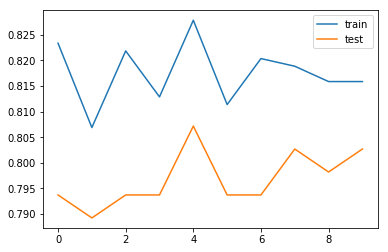

In [62]:
plt.plot(random_states, train_scores, label="train")
plt.plot(random_states, test_scores, label="test")
legend()
plt.show()

In [63]:
best_score, best_parameters

(0.75336322869955152, {'random_state': 0})

In [64]:
mlp_best = MLPClassifier(**best_parameters)
mlp_best.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

### Cross Validation

In [65]:
# cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, 
#                 pre_dispatch='2*n_jobs')
# Evaluate a score by cross-validation

mlp = MLPClassifier(random_state=0)
scores = cross_val_score(mlp, X, y, cv=5)     # 5-fold cross validation    

In [66]:
scores

array([ 0.58659218,  0.72067039,  0.70786517,  0.73595506,  0.70621469])

It performs 5-fold cross validation, returning five test scores.

In [67]:
scores = cross_val_score(mlp, X, y, cv=10)    # 10-fold cross validation 

In [68]:
scores

array([ 0.58888889,  0.58888889,  0.68539326,  0.76404494,  0.68539326,
        0.73033708,  0.7752809 ,  0.70786517,  0.76404494,  0.67045455])

In [69]:
scores.mean(), scores.std()

(0.69605918737941208, 0.063787638518311096)

We can conclude that we expect the model to be around 70% accurate on average. We can also conclude that there's a relatively high variance in the accuracy between folds with the standard deviation of around 6%. This could imply that the model is very dependent on the particular folds used for training. 

### Threefold Split into Training, Validation and Test sets

In [70]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y)

Split the data into a train+validation set and a test set

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)

Split the train+validation set into training and validation sets